In [ ]:
%matplotlib inline
import pyart
import os
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from metradar.io.decode_fmt_pyart import read_cnrad_fmt
import warnings
warnings.filterwarnings('ignore')

import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)



## You are using the Python ARM Radar Toolkit (Py-ART), an open source
## library for working with weather radar data. Py-ART is partly
## supported by the U.S. Department of Energy as part of the Atmospheric
## Radiation Measurement (ARM) Climate Research Facility, an Office of
## Science user facility.
##
## If you use this software to prepare a publication, please cite:
##
##     JJ Helmus and SM Collis, JORS 2016, doi: 10.5334/jors.119



In [2]:
filepath = '/mnt/e/metradar_test/radar_aws/radar_fmt/2021/07/20/Z9371/'

filename='Z_RADR_I_Z9371_20210720083000_O_DOR_SAD_CAP_FMT.bin.bz2'

# 读取雷达数据
radar = read_cnrad_fmt(filepath + os.sep +filename)

# 准备绘图对象
display = pyart.graph.RadarMapDisplay(radar)
projection = ccrs.PlateCarree()

g_rad_lon = radar.longitude['data'][0]
g_rad_lat = radar.latitude['data'][0]


In [3]:
radar.info()

altitude:
	data: <ndarray of type: float64 and shape: (1,)>
	long_name: Altitude
	standard_name: Altitude
	units: meters
	positive: up
altitude_agl: None
antenna_transition: None
azimuth:
	data: <ndarray of type: float64 and shape: (3996,)>
	units: degrees
	standard_name: beam_azimuth_angle
	long_name: azimuth_angle_from_true_north
	axis: radial_azimuth_coordinate
	comment: Azimuth of antenna relative to true north
elevation:
	data: <ndarray of type: float32 and shape: (3996,)>
	units: degrees
	standard_name: beam_elevation_angle
	long_name: elevation_angle_from_horizontal_plane
	axis: radial_elevation_coordinate
	comment: Elevation of antenna relative to the horizontal plane
fields:
	velocity:
		data: <ndarray of type: float32 and shape: (3996, 1840)>
		units: meters_per_second
		standard_name: radial_velocity_of_scatterers_away_from_instrument
		long_name: Mean doppler Velocity
		valid_max: 95.0
		valid_min: -95.0
		coordinates: elevation azimuth range
		_FillValue: -9999.0
	differen

In [3]:
rs=2 # 多少度的范围,半径

In [4]:
radar.fixed_angle['data']

array([ 0.48339844,  0.48339844,  1.4941406 ,  1.4941406 ,  2.4169922 ,
        3.2958984 ,  4.3066406 ,  6.020508  ,  9.887695  , 14.589844  ,
       19.511719  ], dtype=float32)

## 画回波强度（R, reflectivity)

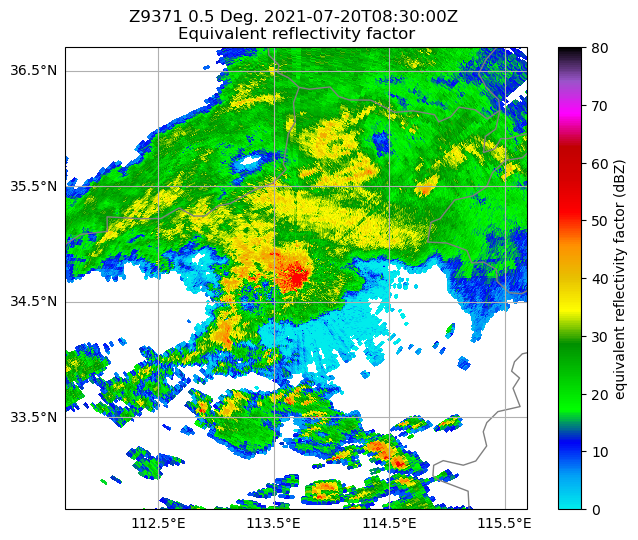

In [ ]:
fig = plt.figure(figsize=(8,6))
map_panel_axes = [0.1, 0.1, .80, .80]

# plot_ppi_map需要从网络下载map数据，第一次使用会比较慢
display.plot_ppi_map('reflectivity', sweep=0, vmin=0, vmax=80,cmap='NWSRef',resolution='50m',
                     min_lon=g_rad_lon-rs, max_lon=g_rad_lon+rs, 
                     min_lat=g_rad_lat -rs, max_lat=g_rad_lat +rs,
                     lon_lines=np.arange(int(g_rad_lon)+0.5 -rs,int(g_rad_lon)+1 +rs, 1),
                     lat_lines=np.arange(int(g_rad_lat)+0.5 -rs,int(g_rad_lat)+1+ rs, 1), 
                     fig=fig, lat_0=g_rad_lat,lon_0=g_rad_lon,projection=projection)
display.plot_point(g_rad_lon, g_rad_lat)

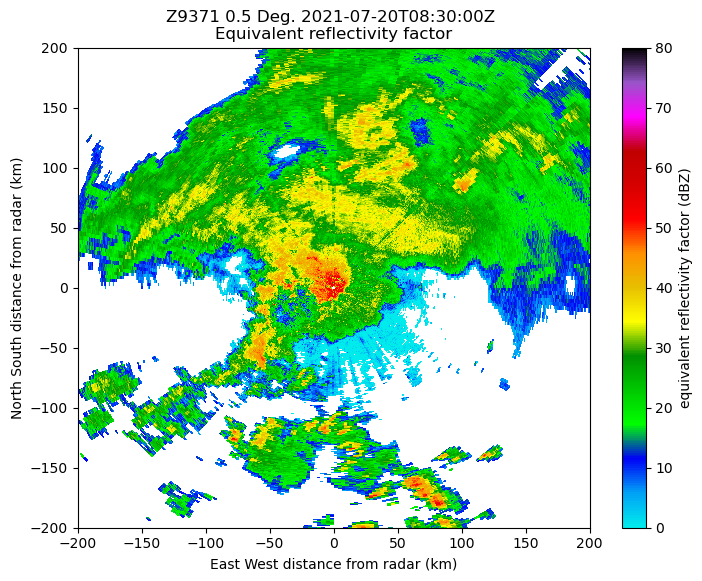

In [ ]:
fig = plt.figure(figsize=(8,6))
map_panel_axes = [0.1, 0.1, .80, .80]
ax = fig.add_axes(map_panel_axes)

display.plot('reflectivity', sweep=0, vmin=0, vmax=80,cmap='NWSRef',fig=fig, ax=ax)
ax.set_xlim(-200, 200)
ax.set_ylim(-200, 200)

# 用plot方式绘图显示正常
# plt.savefig('TEST.png', dpi=250)
# display.plot_point(g_rad_lon, g_rad_lat)

## 画径向速度（V, velocity）

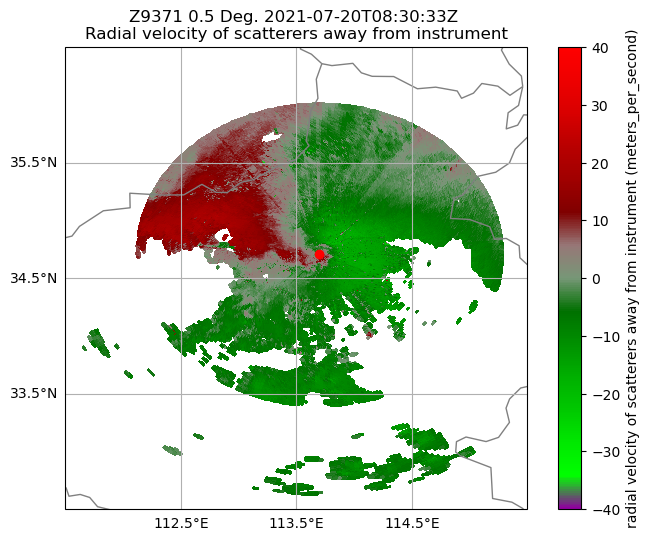

In [8]:
fig = plt.figure(figsize=(8,6))

display.plot_ppi_map('velocity', sweep=1, vmin=-40, vmax=40,cmap='NWSVel',resolution='50m',
                     min_lon=int(g_rad_lon)+0.5 -rs, max_lon=int(g_rad_lon)+0.5 +rs, 
                     min_lat=int(g_rad_lat)+0.5 -rs, max_lat=int(g_rad_lat)+0.5 +rs,
                     lon_lines=np.arange(int(g_rad_lon)+0.5 -rs,int(g_rad_lon)+1 + rs, 1),
                     lat_lines=np.arange(int(g_rad_lat)+0.5 -rs,int(g_rad_lat)+1+ rs, 1), 
                     fig=fig, lat_0=g_rad_lat,lon_0=g_rad_lon,projection=projection)
display.plot_point(g_rad_lon, g_rad_lat)

## 画谱宽（SW, spectrum_width）

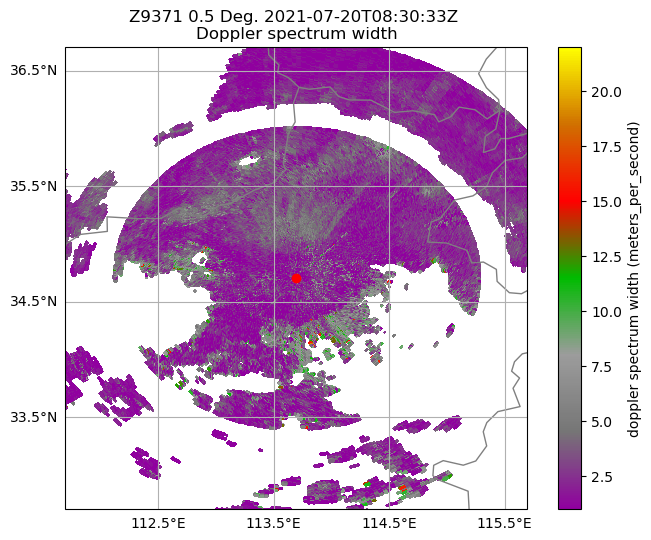

In [9]:
fig = plt.figure(figsize=(8,6))

display.plot_ppi_map('spectrum_width', sweep=1, vmin=1, vmax=22,cmap='NWS_SPW',resolution='50m',
                     min_lon=g_rad_lon-rs, max_lon=g_rad_lon+rs, 
                     min_lat=g_rad_lat -rs, max_lat=g_rad_lat +rs,
                     lon_lines=np.arange(int(g_rad_lon)+0.5 -rs,int(g_rad_lon)+1 + rs, 1),
                     lat_lines=np.arange(int(g_rad_lat)+0.5 -rs,int(g_rad_lat)+1+ rs, 1), 
                     fig=fig, lat_0=g_rad_lat,lon_0=g_rad_lon,projection=projection)
display.plot_point(g_rad_lon, g_rad_lat)

## 画差分反射率因子（ZDR, differential_reflectivity）

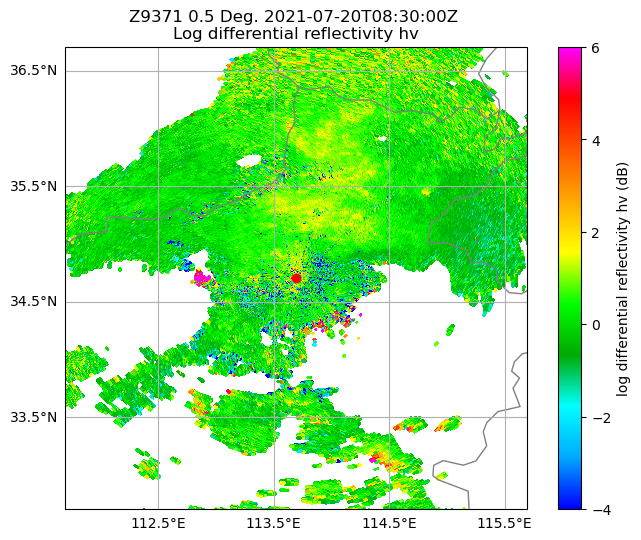

In [10]:
fig = plt.figure(figsize=(8,6))

display.plot_ppi_map('differential_reflectivity',sweep= 0, vmin=-4, vmax=6,cmap='RefDiff',resolution='50m',
                     min_lon=g_rad_lon-rs, max_lon=g_rad_lon+rs, 
                     min_lat=g_rad_lat -rs, max_lat=g_rad_lat +rs,
                     lon_lines=np.arange(int(g_rad_lon)+0.5 -rs,int(g_rad_lon)+1 + rs, 1),
                     lat_lines=np.arange(int(g_rad_lat)+0.5 -rs,int(g_rad_lat)+1+ rs, 1), 
                     fig=fig, lat_0=g_rad_lat,lon_0=g_rad_lon,projection=projection)
display.plot_point(g_rad_lon, g_rad_lat)

## 画交叉相关系数（CC, cross_correlation_ratio）

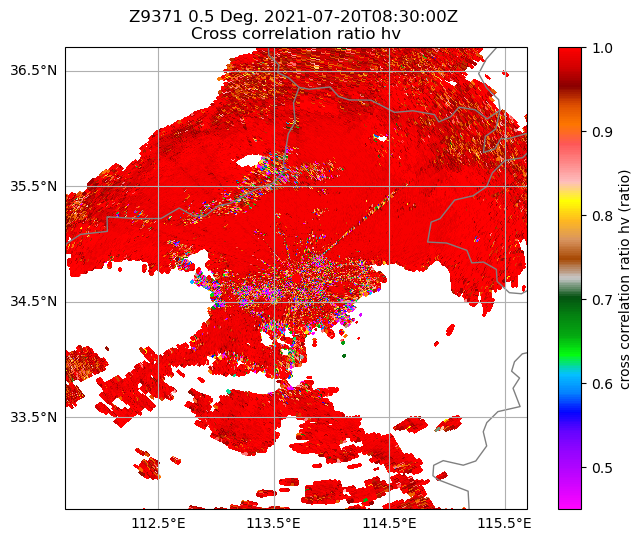

In [ ]:
fig = plt.figure(figsize=(8,6))
display.plot_ppi_map('cross_correlation_ratio', 0, vmin=0.45, vmax=1,cmap='Wild25',resolution='50m',
                     min_lon=g_rad_lon-rs, max_lon=g_rad_lon+rs, 
                     min_lat=g_rad_lat -rs, max_lat=g_rad_lat +rs,
                     lon_lines=np.arange(int(g_rad_lon)+0.5 -rs,int(g_rad_lon)+1 + rs, 1),
                     lat_lines=np.arange(int(g_rad_lat)+0.5 -rs,int(g_rad_lat)+1+ rs, 1), 
                     fig=fig, lat_0=g_rad_lat,lon_0=g_rad_lon,projection=projection)
display.plot_point(g_rad_lon, g_rad_lat)

## 画差分传播相移（PHI, differential_phase）

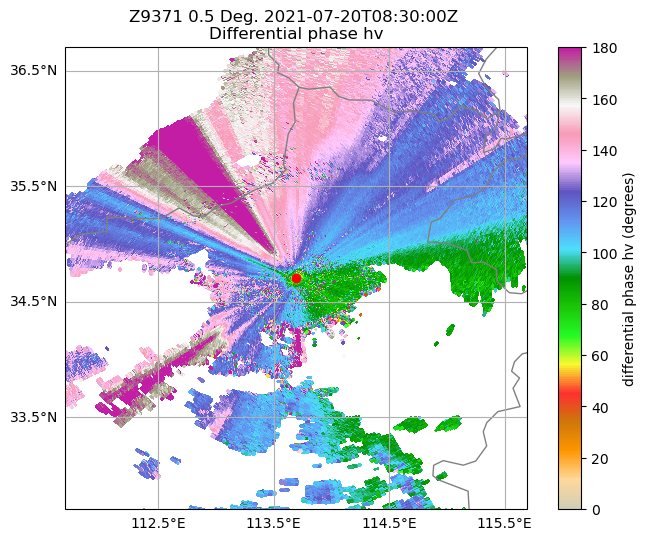

In [12]:
## 画差分传播相移（PHI, differential_phase）fig = plt.figure(figsize=(8,6))
fig = plt.figure(figsize=(8,6))
display.plot_ppi_map('differential_phase', sweep=0, vmin=0, vmax=180,cmap='PD17',resolution='50m',
                     min_lon=g_rad_lon-rs, max_lon=g_rad_lon+rs, 
                     min_lat=g_rad_lat -rs, max_lat=g_rad_lat +rs,
                     lon_lines=np.arange(int(g_rad_lon)+0.5 -rs,int(g_rad_lon)+1 + rs, 1),
                     lat_lines=np.arange(int(g_rad_lat)+0.5 -rs,int(g_rad_lat)+1+ rs, 1), 
                     fig=fig, lat_0=g_rad_lat,lon_0=g_rad_lon,projection=projection)
display.plot_point(g_rad_lon, g_rad_lat)

## 将多个变量画在一起

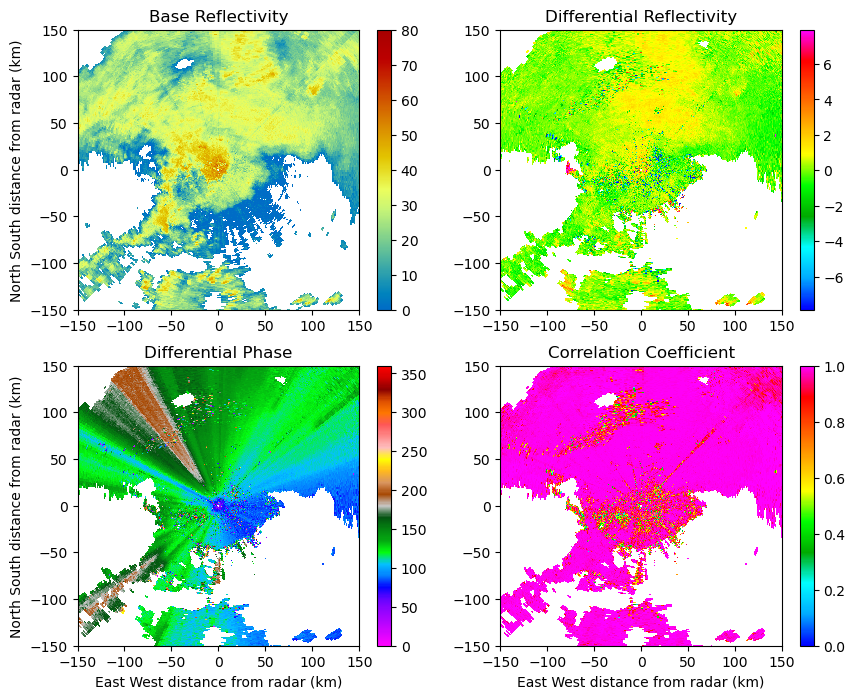

In [13]:
fig = plt.figure(figsize=(10, 8))

Range=150
ax = fig.add_subplot(221)
display.plot('reflectivity', 0, ax=ax, title='Base Reflectivity',
             colorbar_label='',vmin=0,vmax=80,
             axislabels=('', 'North South distance from radar (km)'))
display.set_limits((-1*Range, Range), (-1*Range, Range), ax=ax)

ax = fig.add_subplot(222)
display.plot('differential_reflectivity', 0, ax=ax,
             title='Differential Reflectivity', colorbar_label='',
             axislabels=('', ''))
display.set_limits((-1*Range, Range), (-1*Range, Range), ax=ax)

ax = fig.add_subplot(223)
display.plot('differential_phase', 0, ax=ax,
             title='Differential Phase', colorbar_label='')
display.set_limits((-1*Range, Range), (-1*Range, Range), ax=ax)

ax = fig.add_subplot(224)
display.plot('cross_correlation_ratio', 0, ax=ax,
             title='Correlation Coefficient', colorbar_label='',
             axislabels=('East West distance from radar (km)', ''))
display.set_limits((-1*Range, Range), (-1*Range, Range), ax=ax)

## 画垂直剖面图

(0.0, 20.0)

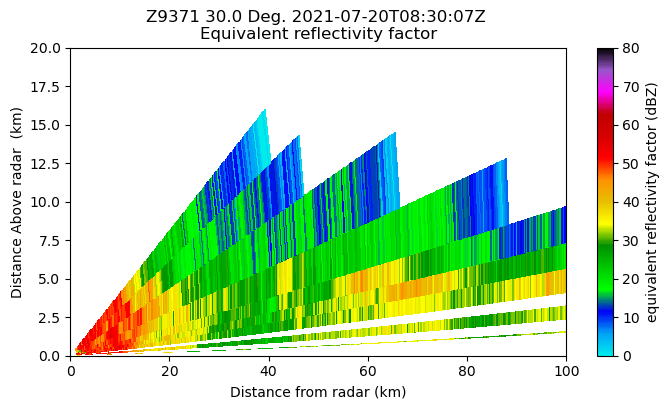

In [14]:
xsect = pyart.util.cross_section_ppi(radar, [30])

display_rhi = pyart.graph.RadarDisplay(xsect)
fig = plt.figure(figsize=[8,4])
ax = fig.add_subplot(111)
display_rhi.plot('reflectivity', 0, vmin=0, vmax=80.,cmap='NWSRef')
ax.set_xlim([0,100])
ax.set_ylim([0,20])